In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [6]:
train_df=pd.read_csv("/content/drive/MyDrive/ML/Class4/train.csv")
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:>

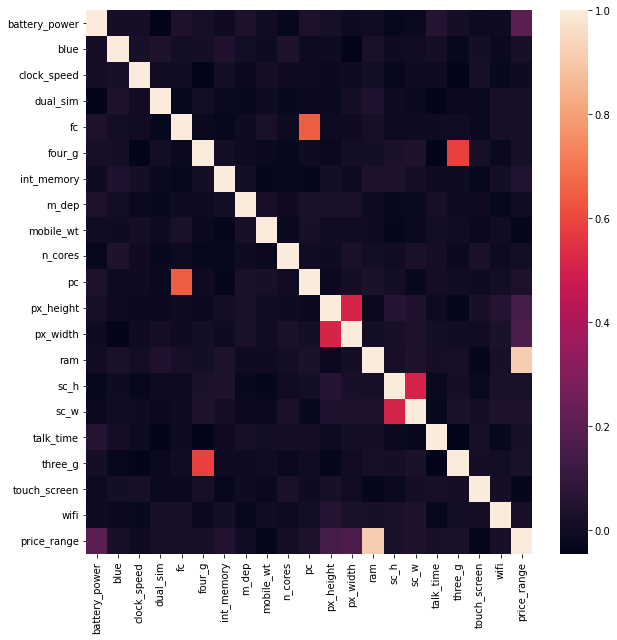

In [9]:
plt.figure(figsize = (10, 10))
corr = train_df.corr()
sns.heatmap(corr)

In [16]:
x = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [17]:
model = svm.SVC(kernel = 'linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9775


In [19]:
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.98      0.97      0.97        92
           2       0.94      0.98      0.96        99
           3       0.99      0.97      0.98       114

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [20]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[ 94   1   0   0]
 [  0  89   3   0]
 [  0   1  97   1]
 [  0   0   3 111]]


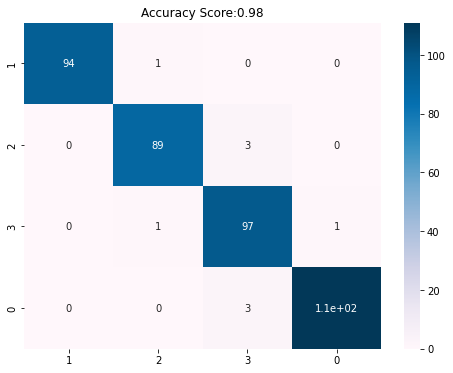

In [23]:
outcome = train_df['price_range'].unique()
cm = pd.DataFrame(conf_mat, outcome, outcome)
plt.figure(figsize = (8, 6))
plt.title('Accuracy Score:{0:.2f}'.format(accuracy_score(y_test, pred)))
sns.heatmap(cm, annot = True, cmap = 'PuBu')
plt.show()